In [22]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import datetime
from datetime import datetime
from datetime import timedelta

In [23]:
datos=pd.read_csv( r'owid-covid-data.csv')
datos.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [24]:
datos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134235 entries, 0 to 134234
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    134235 non-null  object 
 1   continent                                   125670 non-null  object 
 2   location                                    134235 non-null  object 
 3   date                                        134235 non-null  object 
 4   total_cases                                 126859 non-null  float64
 5   new_cases                                   126857 non-null  float64
 6   new_cases_smoothed                          125814 non-null  float64
 7   total_deaths                                115686 non-null  float64
 8   new_deaths                                  115882 non-null  float64
 9   new_deaths_smoothed                         125814 non-null  float64
 

In [25]:
lista_pais = datos['location'].unique()
print(sorted(lista_pais))

['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'F

##### Selecionaremos tres paises de Europa y tres de America Latina.
   
      Se consideraron aquellos pasies vecinos con acciones similares en el control de la pandemia. No son comparables en cuanto a su poblacion, por lo tanto utilizaremos indicadores por millon de habitantes.

    Europa = Alemania, Reino Unido y España.
    America Latina = Chile, Colomnia, Argentina.

In [26]:
paises_comp = datos[datos.location.isin(['Chile','Colombia','Argentina','Spain','Germany','United Kingdom'])]
paises_comp['location'].unique()

array(['Argentina', 'Chile', 'Colombia', 'Germany', 'Spain',
       'United Kingdom'], dtype=object)

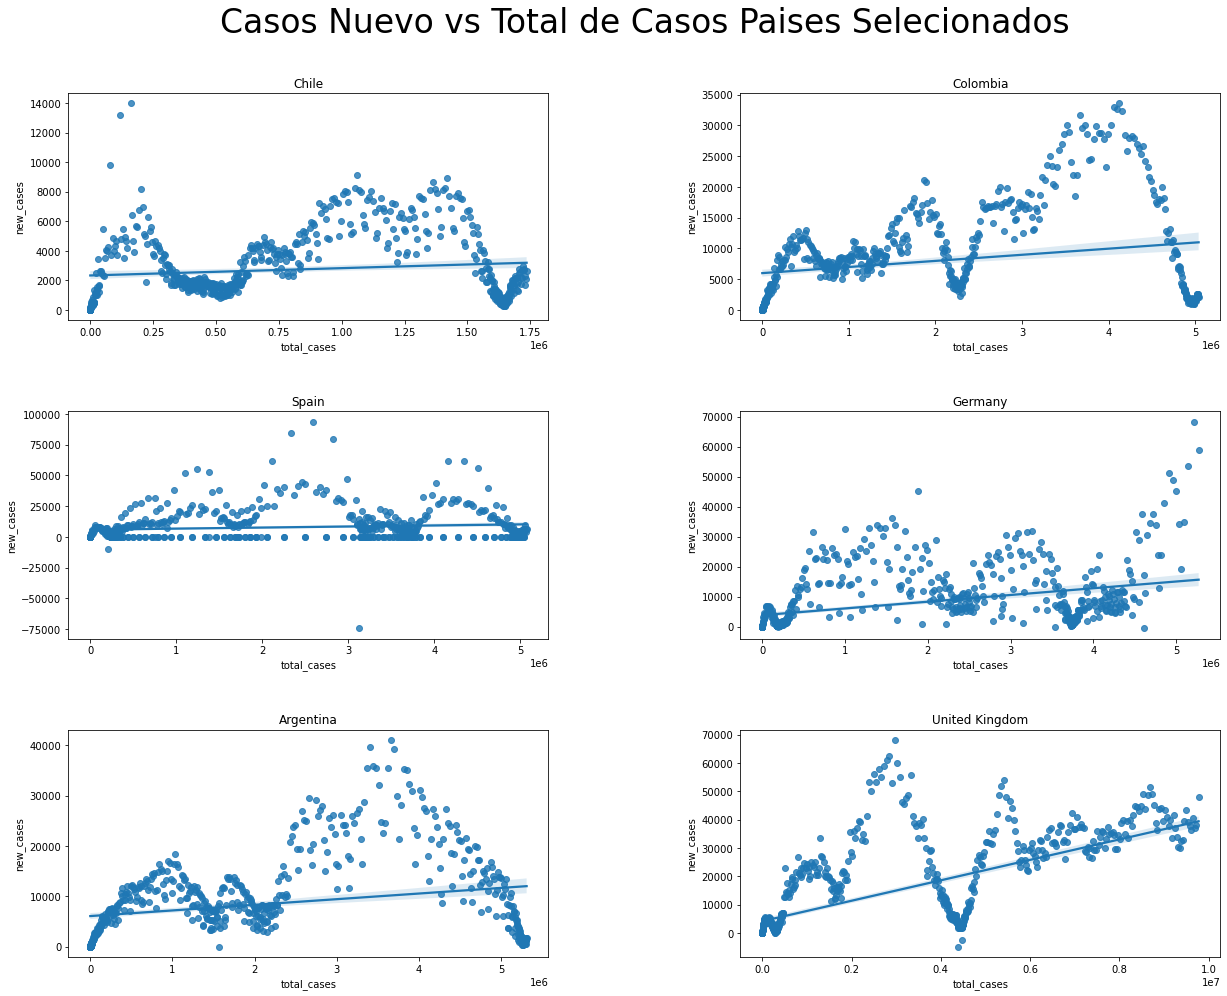

In [27]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(20,15))

sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Chile'],ax=ax1).set_title('Chile')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Colombia'],ax=ax2).set_title('Colombia')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Spain'],ax=ax3).set_title('Spain')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Germany'],ax=ax4).set_title('Germany')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='Argentina'],ax=ax5).set_title('Argentina')
sns.regplot(x='total_cases',y='new_cases',data=paises_comp[paises_comp['location']=='United Kingdom'],ax=ax6).set_title('United Kingdom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Casos Nuevo vs Total de Casos Paises Selecionados', fontsize=33)

plt.show()

##### Podemos observar un relacion directa entre el total de casos y nuevos casos tanto para los paises de europa y de america latina selecionados.

<Figure size 432x288 with 0 Axes>

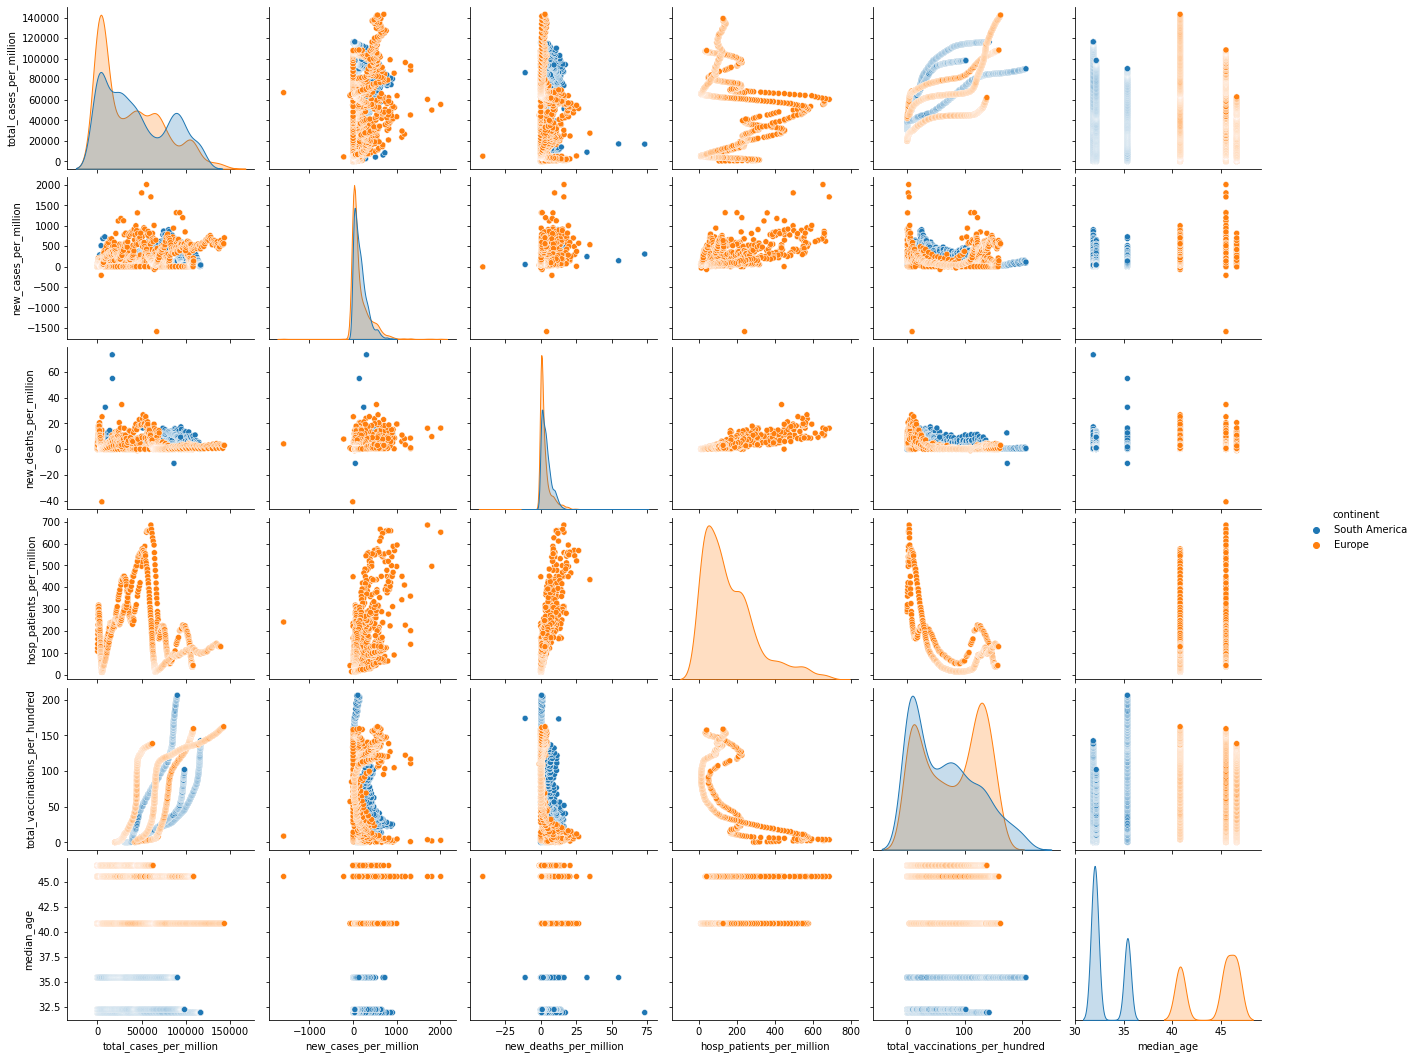

In [57]:
figz= plt.figure()
col_prop = ["total_cases_per_million","new_cases_per_million","new_deaths_per_million",'hosp_patients_per_million','total_vaccinations_per_hundred','median_age',"continent"]
graph=sns.pairplot(paises_comp[col_prop],hue="continent")
graph.fig.set_size_inches(20,15)
plt.show()

##### Podemos observar algunas relaciones entre la cantiadad de muertes en funcion de como avanza la vacunacion, donde a medida que avanza esta medida las muertes se reducen de manera siginificativa en Europa y de una forma menos drastica en AL. Esto se debe a que en los paises de europeos tuvieron acceso mas temprano a vacunas a diferencia de Latam. Tambien el numero de hospitalizados baja, pero tambien podemos ver que estos datos en Latam no estan presentes.

##### Por otra parte los contagios no tiene un relacion a la vacunacion, entendiendo que estar vacunado no evita el contagio de covid-19.

##### Ademas es posible notar que la media de edad en Europa es mayor a la de Latam.

###### existen datos negativos lo que debe ser revisado.

<AxesSubplot:>

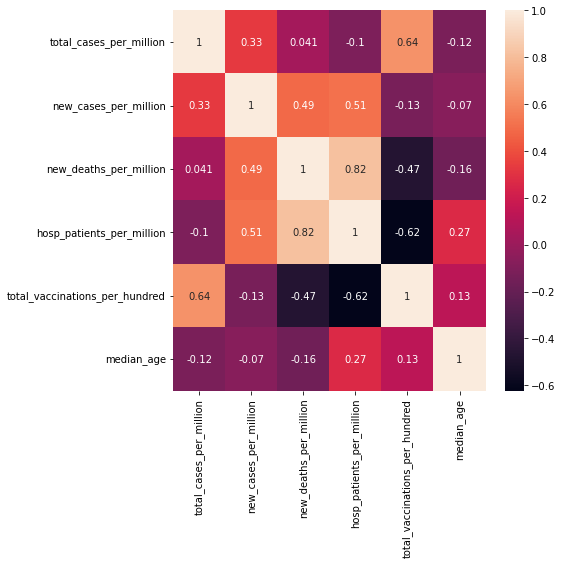

In [54]:
#col_prop = ["total_cases_per_million","new_cases_per_million","new_deaths_per_million",'hosp_patients_per_million','total_vaccinations_per_hundred','median_age',"continent"]
fig =plt.subplots(figsize=(7,7))
sns.heatmap(paises_comp[col_prop].corr(), annot=True)

##### En tanto las correlaciones directas relevantes entre total de caso y total de vacunas, muertes y hospotalizados. Relaciones inversas entre hospitalizados y vacunado. Algo que tiene bastante sentido en relacion a la contencion de la pandemia por parte de las campañas de vacunacion.

##### Separaremos los paises selecionados en diferentes set de datos para un trabajo comparativo.

In [35]:
df_cl= paises_comp[paises_comp['location']=='Chile']
df_co= paises_comp[paises_comp['location']=='Colombia']
df_sp= paises_comp[paises_comp['location']=='Spain']
df_ge= paises_comp[paises_comp['location']=='Germany']
df_ar= paises_comp[paises_comp['location']=='Argentina']
df_uk= paises_comp[paises_comp['location']=='United Kingdom']

##### Establecer los dias transcurridos nos ayudara a entender como se mueven los datos en el tiempo en una medida comparable, dado que sabemos que cada pais tomo medidas en diferentes momentos del tiempo, lo que comparado en fechas no resultaria conveniente.

In [58]:
#creamos la columna dias, que nos ayudara a trabajar los datos en funcion del tiempo, no hablamos de fechas si no de dias transcurridos.
df_cl['dias']=np.arange(0,len(df_cl['location']))
df_co['dias']=np.arange(0,len(df_co['location']))
df_sp['dias']=np.arange(0,len(df_sp['location']))
df_ge['dias']=np.arange(0,len(df_ge['location']))
df_ar['dias']=np.arange(0,len(df_ar['location']))
df_uk['dias']=np.arange(0,len(df_uk['location']))

<ipython-input-58-bd1c785abf54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['dias']=np.arange(0,len(df_cl['location']))
<ipython-input-58-bd1c785abf54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co['dias']=np.arange(0,len(df_co['location']))
<ipython-input-58-bd1c785abf54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

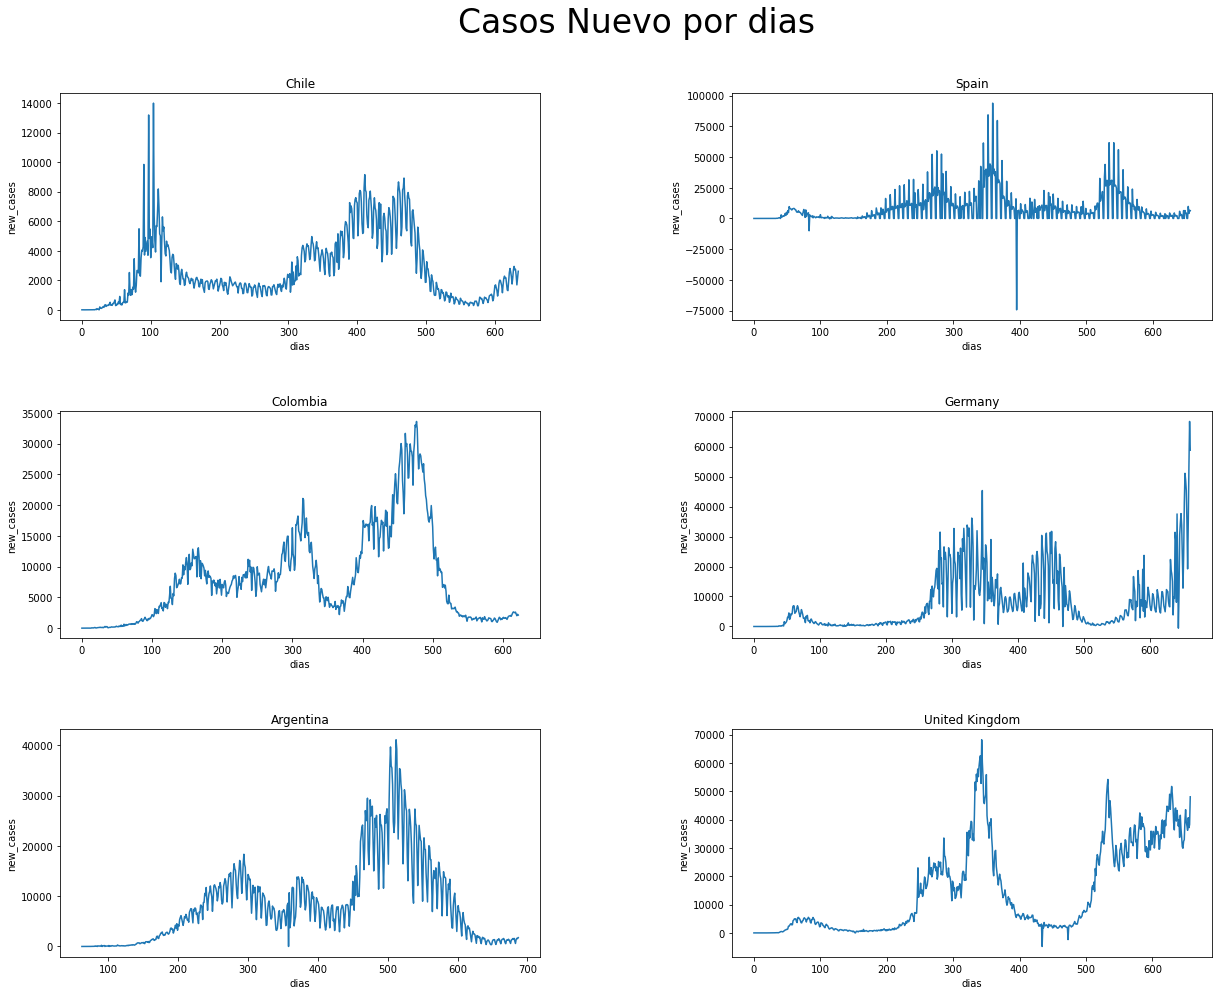

In [62]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6))= plt.subplots(3,2,figsize=(20,15))

sns.lineplot(x='dias',y='new_cases',data=df_cl,ax=ax1).set_title('Chile')
sns.lineplot(x='dias',y='new_cases',data=df_sp,ax=ax2).set_title('Spain')
sns.lineplot(x='dias',y='new_cases',data=df_co,ax=ax3).set_title('Colombia')
sns.lineplot(x='dias',y='new_cases',data=df_ge,ax=ax4).set_title('Germany')
sns.lineplot(x='dias',y='new_cases',data=df_ar,ax=ax5).set_title('Argentina')
sns.lineplot(x='dias',y='new_cases',data=df_uk,ax=ax6).set_title('United Kingdom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Casos Nuevo por dias', fontsize=33)

plt.show()

###### Cuando comparamos la relacion que existe entre los nuevos casos y los dias transcurridos desde el pirmer contagio informado, podemos ver que en los paises de Latam existe un desface entre los paises, donde chile alcanzo su priemeos pic´s a los 100 dias, paises como Colombia y Argentina lo experimentaron cercano 150 y 250 dias respectivamente. 

##### En el caso de Europa la curva de contagios toma mayor crecimiento posterior a los 200 dias desde el primer caso, con picos cercanos los 300 dias 

    Podemos notar que latam a vivido al menos dos olas de contagios, para luego decantar a minimos tal como le ocurrio a europa a eso de 450 dias de transcurrido el primera caso, con un aumento considerable en este ultimo grupo debido principalmente a las bajas tasas de vacunacion por parte de algunos grupos de la poblacion. Lo que pude dar indicaciones que en los paises latinos la aceptacion de esta medida es mayor por parte de sus habitantes.


#### Respecto al total de casos registrado en el tiempo, notamos acontinuacion que entre los 30 y 90 dias de transcurrida la pandemia las curvas de contagio ya mostraban una tendencia de crecimiento exponencial dada la falta de conocimiento por parte de los paises en realcion a como enfrentar la pandamia.

In [161]:
#rango de dias para evaluar la evolucion
inicio = 30
fin = 90

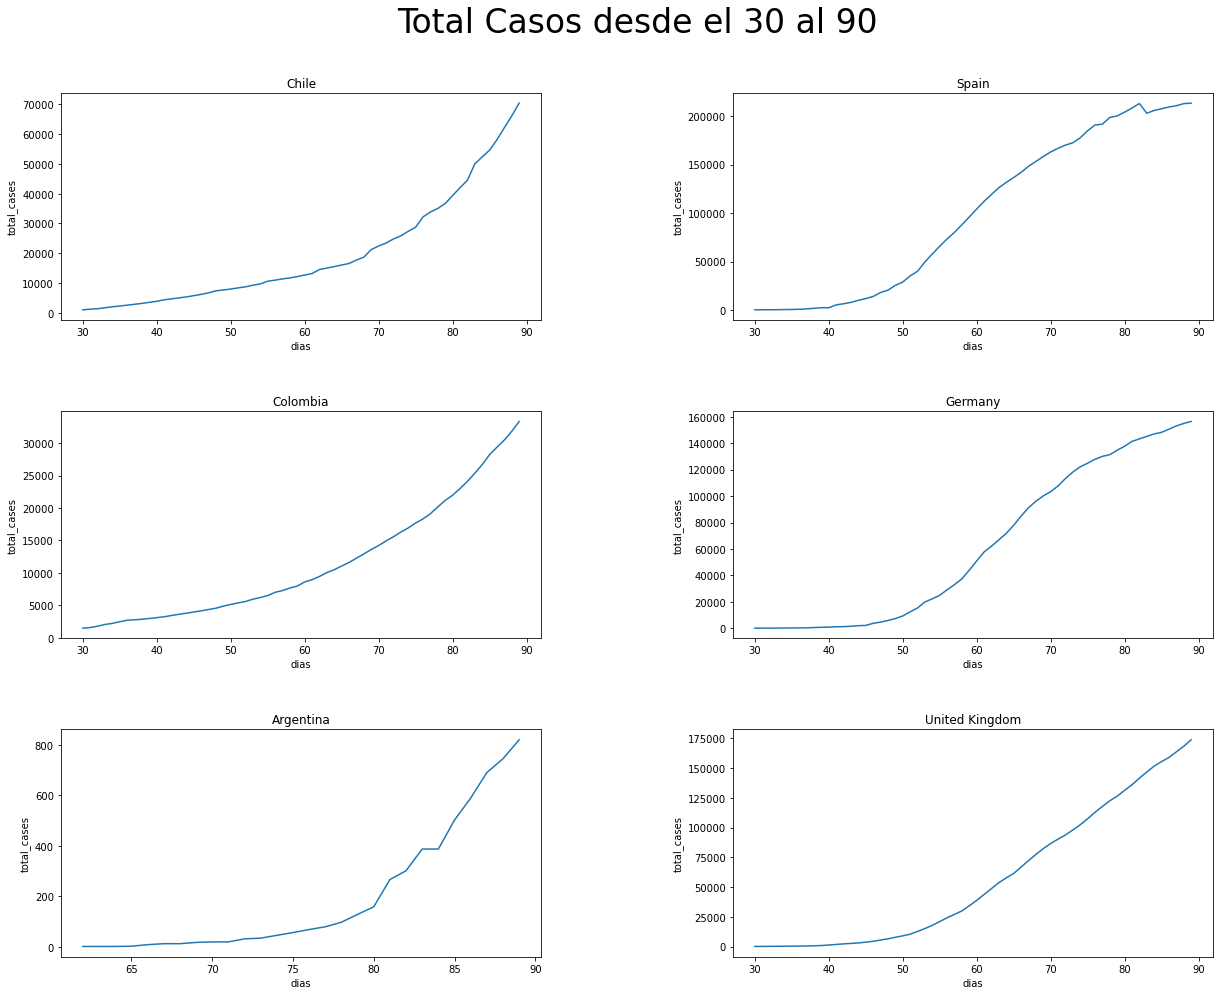

In [162]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(20,15))

sns.lineplot(x='dias',y='total_cases',data=df_cl[inicio:fin],ax=ax1).set_title('Chile')
sns.lineplot(x='dias',y='total_cases',data=df_sp[inicio:fin],ax=ax2).set_title('Spain')
sns.lineplot(x='dias',y='total_cases',data=df_co[inicio:fin],ax=ax3).set_title('Colombia')
sns.lineplot(x='dias',y='total_cases',data=df_ge[inicio:fin],ax=ax4).set_title('Germany')
sns.lineplot(x='dias',y='total_cases',data=df_ar[inicio:fin],ax=ax5).set_title('Argentina')
sns.lineplot(x='dias',y='total_cases',data=df_uk[inicio:fin],ax=ax6).set_title('United Kingdom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Total Casos desde el 30 al 90', fontsize=33)

plt.show()

Text(0.5, 0.98, 'Casos Nuevo vs dias')

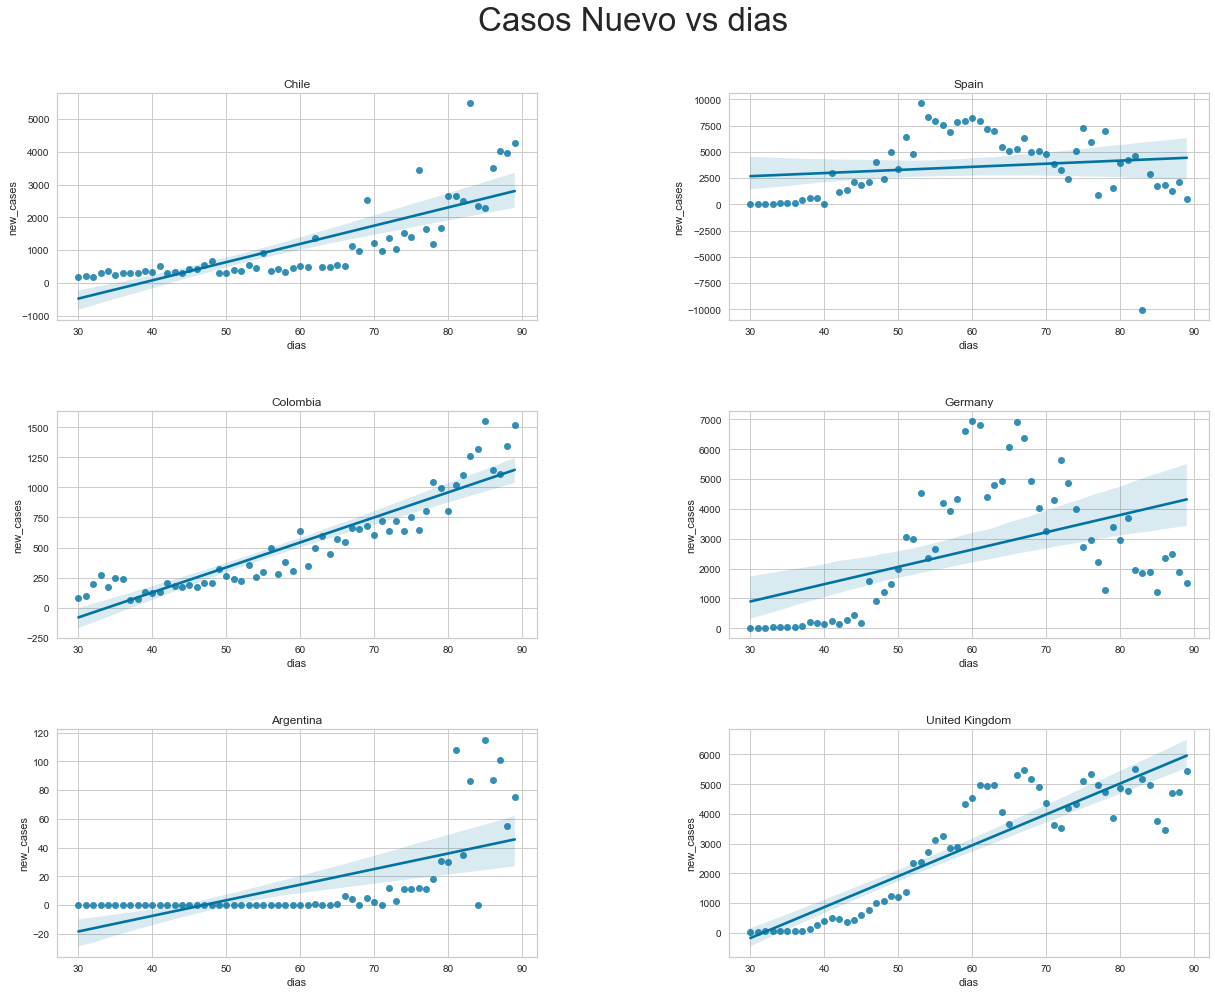

In [210]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(20,15))

sns.regplot(x='dias',y='new_cases',data=df_cl[inicio:fin],ax=ax1).set_title('Chile')
sns.regplot(x='dias',y='new_cases',data=df_sp[inicio:fin],ax=ax2).set_title('Spain')
sns.regplot(x='dias',y='new_cases',data=df_co[inicio:fin],ax=ax3).set_title('Colombia')
sns.regplot(x='dias',y='new_cases',data=df_ge[inicio:fin],ax=ax4).set_title('Germany')
sns.regplot(x='dias',y='new_cases',data=df_ar[inicio:fin],ax=ax5).set_title('Argentina')
sns.regplot(x='dias',y='new_cases',data=df_uk[inicio:fin],ax=ax6).set_title('United Kingdom')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig.suptitle('Casos Nuevo vs dias', fontsize=33)

Un acercamiento a la relacion lineal de la pandemia en el tiempo es muy clara, pero para ese entonces no estaba muy claro cuales serian las medidas que tomaria cada pais al respecto, sin embargo el no tomar medidas acertadas a ese entonces marcara de manera considerable el desarrollo de la misma.

En el caso de Argentina podemos ver que la variable de resago lleva a sus primeros registros luego de los 60 dias.

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$

### Estimacion de factor exponencial de contagios por pasies selecionados


In [164]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [211]:
#Creando columnas para evaluar la prediccion

#chile
dias_cl = df_cl['dias'][inicio:fin]
casos_cl = df_cl['total_cases'][inicio:fin]
#colombia
dias_co = df_co['dias'][inicio:fin]
casos_co = df_co['total_cases'][inicio:fin]
#españa
dias_sp = df_sp['dias'][inicio:fin]
casos_sp = df_sp['total_cases'][inicio:fin]
#alemania
dias_ge = df_ge['dias'][inicio:fin]
casos_ge = df_ge['total_cases'][inicio:fin]

#Argentina
df_ar.fillna(0, inplace=True) #ojo aca 
dias_ar = df_ar['dias'][inicio:fin]
casos_ar = df_ar['total_cases'][inicio:fin]

#reino unido
dias_uk = df_uk['dias'][inicio:fin]
casos_uk = df_uk['total_cases'][inicio:fin]

###### Argentina - en este caso hacemos un remplazo en los valores faltantes, considerando que Arg tuvo casos iniciales sin registro lo que dado su resago influye en el analisis


#### Evaluando dias y casos

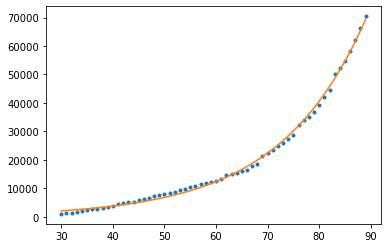

In [172]:
#Chile
diasp = dias_cl
casosp = casos_cl

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_cl = k

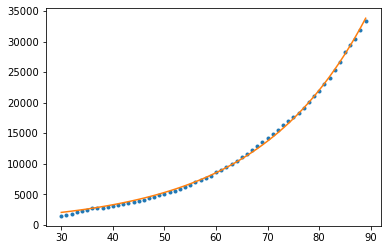

In [173]:
#colombia
diasp = dias_co
casosp = casos_co

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_co = k

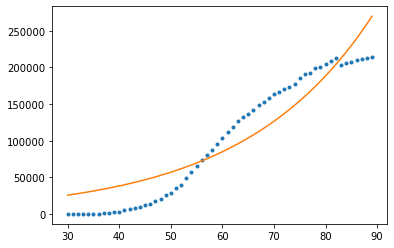

In [174]:
#españa
diasp = dias_sp
casosp = casos_sp

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_sp = k

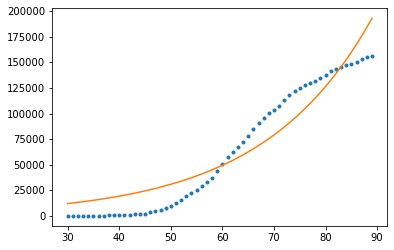

In [175]:
#Alemania
diasp = dias_ge
casosp = casos_ge

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_ge = k

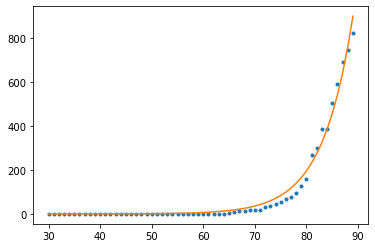

In [176]:
#Argentina
diasp = dias_ar
casosp = casos_ar

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_ar = k

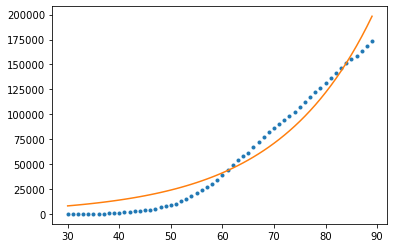

In [182]:
#Reino Unido
diasp = dias_uk
casosp = casos_uk

popt, pcov = curve_fit(exponencial,diasp,casosp,maxfev=1000)
k=popt[0]
t0=popt[1]
casos_sim=exponencial(diasp,k,t0)
plt.plot(diasp,casosp,'.')
plt.plot(diasp,casos_sim)

k_uk = k

###### Al realizar una primera estiamcion simple sobre los casos informados podemos desyacar que una vez estimado el factor exponencial para cada pais es posible realizar estimaciones bastante cercanas a la realidad, sin embargo esta metrica es efectiva solo para periodos cortos de tiempo, dado que posibles cambios de tendencia en la curva puede afectar la metrica.

###### Intervalo de confianza paises selecionados

In [183]:
k_comp = [k_cl,k_co,k_ar,k_sp,k_ge,k_uk]
pais_k = ['cl','co','ar','sp','ge','uk']
k_comp = pd.DataFrame(k_comp,pais_k)
k_comp, k_comp.describe()

(           0
 cl  0.059585
 co  0.047422
 ar  0.169452
 sp  0.039832
 ge  0.046960
 uk  0.054103,
               0
 count  6.000000
 mean   0.069559
 std    0.049399
 min    0.039832
 25%    0.047076
 50%    0.050763
 75%    0.058214
 max    0.169452)

[0   -0.018827
dtype: float64, 0    0.105643
dtype: float64]
0    0.12447
dtype: float64


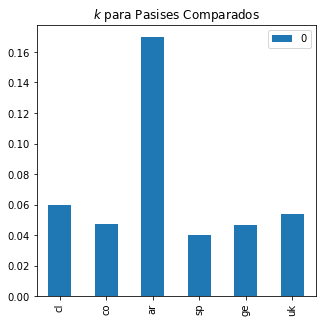

In [184]:
mu_kcomp=np.mean(k_comp)
sigma_ks=np.std(k_comp)
z=1.96
n=len(k_comp)
int_conf= [mu_kcomp-z*sigma_ks/np.sqrt(1),mu_kcomp+z*sigma_ks/np.sqrt(n)]
print(f"{int_conf }")

print(f"{(int_conf[1] - int_conf[0])}")
k_comp.plot(kind="bar",figsize=(5,5),title='$k$ para Pasises Comparados')
plt.show()

######  Podemos observar que la probabilidad que la media del factor exponencial de contagios K este entre un -0.018827 y 0.105643 con una diferencia de 0.12447, esta diferencia es muy grande para poder tener una representacion precisa. Esto es por que los datos de Argentina afectan de manera significativa la muestra.

###### Recordar que estamos en un periodo de tiempo acotado y segun observamos en graficas enteriores que Argentina retrasa los primeros efectos exponeniales de la curva de contagios, sin embargo al transcurrir los primeros 360 dias su curva tiende a alinearse con el resto de los paises. En esta liena sabemos que Argentina establecio cuerentenas estricas rapidamente para contener los contagios, lo que al parecer funciono, sin embargo esta medida pierde efecto en el tiempo. Al mismo tiempo es seria posible afirmar que una baja tasa de contagios mantuvo bajos niveles de Hospitalizacion restando presion al sistema de salud reduciendo las muertes. 



###### Intervalo de confianza sin Argentina

In [194]:
k_comp2 = [k_cl,k_co,k_sp,k_ge,k_uk]
pais_k2 = ['cl','co','sp','ge','uk']
k_comp2 = pd.DataFrame(k_comp2,pais_k2)
k_comp2, k_comp2.describe()

(           0
 cl  0.059585
 co  0.047422
 sp  0.039832
 ge  0.046960
 uk  0.054103,
               0
 count  5.000000
 mean   0.049581
 std    0.007535
 min    0.039832
 25%    0.046960
 50%    0.047422
 75%    0.054103
 max    0.059585)

[0    0.036372
dtype: float64, 0    0.055488
dtype: float64]
0    0.019116
dtype: float64


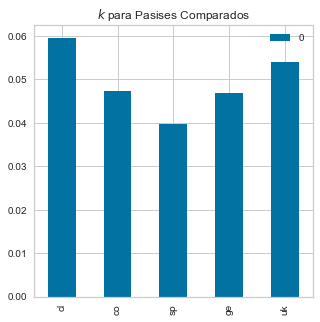

In [195]:
mu_kcomp=np.mean(k_comp2)
sigma_ks=np.std(k_comp2)
z=1.96
n=len(k_comp2)
int_conf= [mu_kcomp-z*sigma_ks/np.sqrt(1),mu_kcomp+z*sigma_ks/np.sqrt(n)]
print(f"{int_conf }")

print(f"{(int_conf[1] - int_conf[0])}")
k_comp2.plot(kind="bar",figsize=(5,5),title='$k$ para Pasises Comparados')
plt.show()

###### Es posible observar que una vez eliminado Argentina nuestro intervalo de confianza se reduce a 0.03 y 0.055 lo que no es una reduccion significativa en relacion a los paises de la muestra, pero reduciendo la diferencia a 0.019, mucho menor que la anterior 0.044.

## Finalmente intentaremos estimar las muertes posibles de america latina en funcion de un modelo estimado con datos de los paises de europa, de esta menera podremos aprovechar el desface de tiempo que existe entre los dias de incio de la pandia.

In [350]:
# uniremos los data set y utilizaremos los paises de europa para predecir cualquier pais de latam.
col_prop = ['dias',
            'total_cases_per_million',
            'new_cases_per_million',
            'new_deaths_per_million',
            'hosp_patients_per_million',
            'total_vaccinations_per_hundred',
            'median_age',"continent"]

In [351]:
paiset = pd.concat([df_cl,df_co,df_sp,df_ge,df_uk])
paiset = paiset[col_prop]
paiset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3235 entries, 24088 to 126679
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dias                3235 non-null   int32  
 1   total_cases         3235 non-null   float64
 2   new_cases           3235 non-null   float64
 3   new_deaths          3083 non-null   float64
 4   total_vaccinations  1412 non-null   float64
 5   median_age          3235 non-null   float64
 6   continent           3235 non-null   object 
dtypes: float64(5), int32(1), object(1)
memory usage: 189.6+ KB


In [355]:
paiset.head()

,dias,total_cases,new_cases,new_deaths,total_vaccinations,median_age,continent
24088,0,2.0,2.0,NaN,NaN,35.4,South America
24089,1,2.0,0.0,NaN,NaN,35.4,South America
24090,2,2.0,0.0,NaN,NaN,35.4,South America
24091,3,2.0,0.0,NaN,NaN,35.4,South America
24092,4,2.0,0.0,NaN,NaN,35.4,South America


In [356]:
paiset['continent'].unique()

array(['South America', 'Europe'], dtype=object)

In [357]:
paiset.fillna(0, inplace=True)

In [358]:
paiset['continent'].replace(['South America','Europe'],[0,1],inplace=True)

In [359]:
df_cl['dias'].max(),df_co['dias'].max(),df_ar['dias'].max(),df_uk['dias'].max(),df_sp['dias'].max()

(634, 622, 687, 657, 656)

In [360]:
paiset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3235 entries, 24088 to 126679
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dias                3235 non-null   int32  
 1   total_cases         3235 non-null   float64
 2   new_cases           3235 non-null   float64
 3   new_deaths          3235 non-null   float64
 4   total_vaccinations  3235 non-null   float64
 5   median_age          3235 non-null   float64
 6   continent           3235 non-null   int64  
dtypes: float64(5), int32(1), int64(1)
memory usage: 189.6 KB


In [361]:
paiset.describe().round()

,dias,total_cases,new_cases,new_deaths,total_vaccinations,median_age,continent
count,3235.0,3235.0,3235.0,3235.0,3235.0,3235.0,3235.0
mean,323.0,1991688.0,8314.0,153.0,17475699.0,40.0,1.0
std,187.0,2013672.0,11340.0,228.0,30343489.0,6.0,0.0
min,0.0,1.0,-74347.0,-1918.0,0.0,32.0,0.0
25%,161.0,268482.0,1067.0,13.0,0.0,35.0,0.0
50%,323.0,1334089.0,3832.0,64.0,0.0,41.0,1.0
75%,485.0,3668658.0,10471.0,194.0,24244377.0,46.0,1.0
max,661.0,9772670.0,93822.0,1826.0,116200713.0,47.0,1.0


In [362]:
rango_in = 90
rango_fin = 600




In [363]:
p_eur = paiset[(paiset["continent"] == 1) & (paiset["dias"] >= rango_in) & (paiset["dias"] <= rango_fin)]
p_ltm = paiset[(paiset["continent"] == 0) & (paiset["dias"] >= rango_in) & (paiset["dias"] <= rango_fin)]

print('Europa {}'.format(p_eur.shape))
print('Latam {}'.format(p_ltm.shape))


Europa (1533, 7)
Latam (1022, 7)


In [364]:
p_eur.describe().round()

,dias,total_cases,new_cases,new_deaths,total_vaccinations,median_age,continent
count,1533.0,1533.0,1533.0,1533.0,1533.0,1533.0,1533.0
mean,345.0,2313021.0,10509.0,169.0,20312192.0,44.0,1.0
std,148.0,1858858.0,13040.0,268.0,31579043.0,3.0,0.0
min,90.0,157770.0,-74347.0,-1918.0,0.0,41.0,1.0
25%,217.0,325263.0,948.0,10.0,0.0,41.0,1.0
50%,345.0,2137691.0,5462.0,60.0,0.0,46.0,1.0
75%,473.0,3768691.0,16233.0,220.0,34723488.0,47.0,1.0
max,600.0,7565751.0,93822.0,1826.0,105754669.0,47.0,1.0


In [365]:
from pycaret.regression import * 

exp1 = setup(data = p_eur, target = 'total_cases',  train_size = 0.7, data_split_shuffle=True, session_id = 2)

,Description,Value
0,session_id,2
1,Target,total_cases
2,Original Data,"(1533, 7)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1073, 6)"


In [367]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,9474.7908,422494257.6487,19773.0190,0.9999,0.0210,0.0084,0.1320
catboost,CatBoost Regressor,28819.8818,2101853622.1468,45421.7788,0.9994,0.0486,0.0262,0.9030
rf,Random Forest Regressor,20589.9380,2627456111.1379,48204.7702,0.9993,0.0315,0.0144,0.1600
lightgbm,Light Gradient Boosting Machine,28913.0631,2778378469.4989,51888.9743,0.9992,0.0338,0.0202,0.0740
xgboost,Extreme Gradient Boosting,26911.6682,2937525811.2000,51658.7977,0.9992,0.0308,0.0177,0.0920
dt,Decision Tree Regressor,24237.9315,4044756865.2254,57556.3903,0.9988,0.0370,0.0162,0.0090
gbr,Gradient Boosting Regressor,59128.6519,7565858196.2567,86304.8487,0.9978,0.0842,0.0537,0.0480
ada,AdaBoost Regressor,251314.3792,80170682509.7352,282685.4301,0.9761,0.4284,0.4069,0.0510
llar,Lasso Least Angle Regression,399654.0128,276525691754.5697,523780.8495,0.9189,0.5660,0.6792,0.0090
lar,Least Angle Regression,399655.3404,276525653172.4096,523780.8522,0.9189,0.5660,0.6792,0.0100


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2, verbose=0, warm_start=False)

In [366]:
#Fold-k indica el numero de validaciones cruzadas para el modelo
cat = create_model(
    estimator='catboost',
    fold=5
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,29677.4116,2508428073.3897,50084.2098,0.9992,0.0428,0.0265
1,32470.6587,2666523885.8794,51638.3955,0.9992,0.0814,0.0344
2,32467.5960,2385104156.3344,48837.5282,0.9993,0.0477,0.0290
3,27356.9794,1514108740.9699,38911.5502,0.9995,0.0528,0.0291
4,30559.8858,2447201120.9876,49469.1937,0.9994,0.0588,0.0295
Mean,30506.5063,2304273195.5122,47788.1755,0.9993,0.0567,0.0297
SD,1913.8200,406011496.9217,4534.6975,0.0001,0.0135,0.0026


In [332]:
new_casse_predict =  predict_model(cat, data=p_ltm)
new_casse_predict.head()

,dias,total_cases_per_million,new_cases_per_million,new_deaths_per_million,total_vaccinations_per_hundred,median_age,continent,Label
24288,200,22312.145,85.466,4.112,0.0,35.4,0,1.639686
24289,201,22409.270,97.125,3.591,0.0,35.4,0,2.150545
24290,202,22520.188,110.918,2.342,0.0,35.4,0,2.924087
24291,203,22628.556,108.368,2.811,0.0,35.4,0,2.918278
24292,204,22716.259,87.704,3.331,0.0,35.4,0,1.766321


In [333]:
new_casse_predict.rename(columns={'Label':'new_deaths_per_million_p'}, inplace=True)
new_casse_predict = new_casse_predict[['continent','dias','new_deaths_per_million_p']]


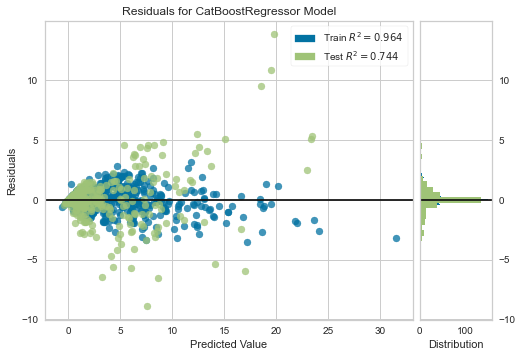

In [334]:
plot_model(cat)

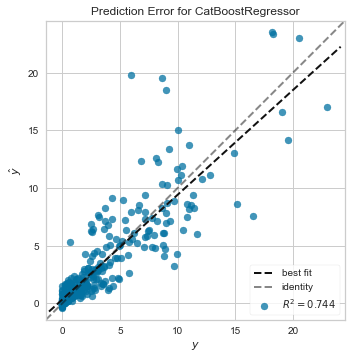

In [335]:
plot_model(cat, plot = 'error')

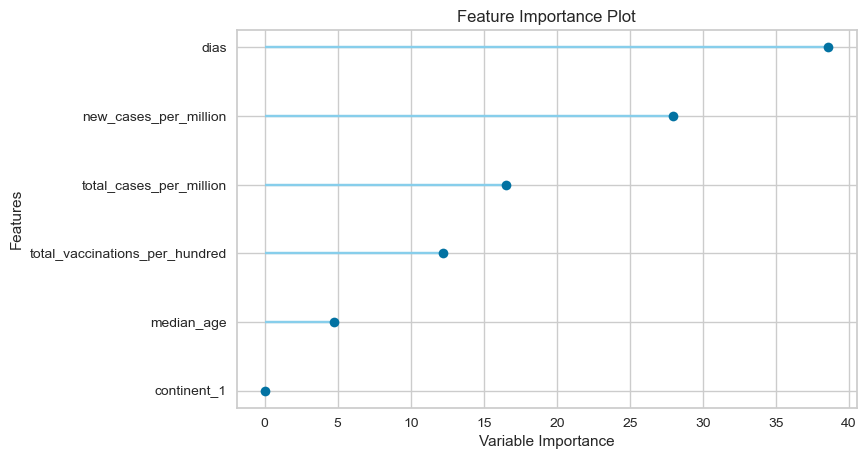

In [337]:
plot_model(cat, plot='feature')

In [336]:
tuned_cat = tune_model(cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.7634,15.6945,3.9616,0.5060,0.4330,1.0208
1,1.1169,4.0533,2.0133,0.8093,0.3385,1.1525
2,1.2909,5.3085,2.3040,0.8283,0.3354,0.7335
3,0.8733,2.0795,1.4420,0.7917,0.3181,0.9123
4,1.2622,5.2946,2.3010,0.7695,0.3472,1.1457
5,1.2427,5.0307,2.2429,0.7043,0.3498,0.7281
6,1.0968,3.1666,1.7795,0.8369,0.3185,0.7640
7,1.3057,4.7795,2.1862,0.5122,0.3431,0.8407
8,0.9769,2.5168,1.5864,0.7170,0.3239,1.1094
9,0.7681,1.9478,1.3956,0.8244,0.3022,1.5714


In [338]:
tune_model(tuned_cat, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.7634,15.6945,3.9616,0.5060,0.4330,1.0208
1,1.1169,4.0533,2.0133,0.8093,0.3385,1.1525
2,1.2909,5.3085,2.3040,0.8283,0.3354,0.7335
3,0.8733,2.0795,1.4420,0.7917,0.3181,0.9123
4,1.2622,5.2946,2.3010,0.7695,0.3472,1.1457
5,1.2427,5.0307,2.2429,0.7043,0.3498,0.7281
6,1.0968,3.1666,1.7795,0.8369,0.3185,0.7640
7,1.3057,4.7795,2.1862,0.5122,0.3431,0.8407
8,0.9769,2.5168,1.5864,0.7170,0.3239,1.1094
9,0.7681,1.9478,1.3956,0.8244,0.3022,1.5714


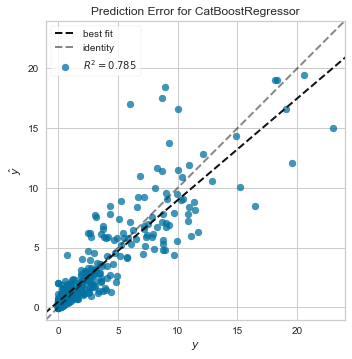

In [339]:
#plot_model(tuned_cat, plot = 'auc')
plot_model(tuned_cat, plot = 'error')

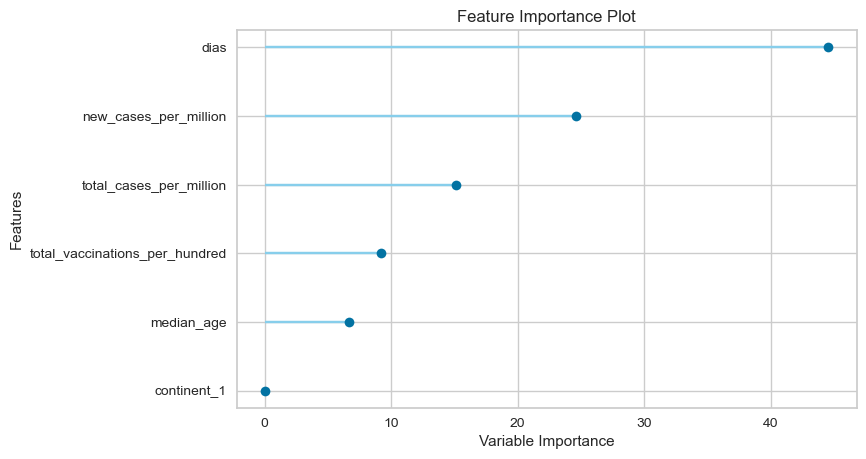

In [340]:
## feature importance
plot_model(tuned_cat, plot='feature')